In [1]:
import logging
import sys

from src.simulator.factory import Factory


logging.basicConfig(
     filename='run.log',
     filemode='w',
     level=logging.INFO,
     format='%(asctime)s - %(name)s - %(levelname)-7s - %(message)s',
     datefmt='%H:%M:%S'
 )
logger = logging.getLogger(__name__)


logger.info('Starting simulation')
factory = Factory.from_config('config/factory.yml')
factory.run(366)
# factory.plot()

In [2]:
# Save as csv.gz
import shutil
import arrow
import pandas as pd

ts = arrow.now('Europe/Helsinki').strftime("%Y%m%d-%H%M%S")
shutil.copy('config/factory.yml', f'results/factory-{ts}.yml')
df = pd.read_csv('results/run.csv')
print(df.columns.tolist())
df.to_csv(f'results/run-{ts}.csv.gz', compression='gzip', index=False)

['Factory.Datetime', 'Machine.State', 'Machine.ProductionInterruptCode', 'Machine.ErrorCode', 'Machine.Program', 'Machine.Temperature', 'Machine.IsPlannedOperatingTime', 'Machine.Consumable.Consumption', 'Machine.Material.Consumption', 'Machine.Material.MaterialId', 'Machine.Material.MaterialIdString', 'Product.SuccessQuantity', 'Product.FailedQuantity', 'Product.Quality', 'ConsumableContainer.Quantity', 'MaterialContainer.Quantity']


In [3]:
(
    df
    .set_index('Factory.Datetime')
    ['Machine.ErrorCode']
    .value_counts(True)
)

0      0.980421
103    0.008604
203    0.004304
202    0.004218
204    0.000970
201    0.000949
102    0.000535
Name: Machine.ErrorCode, dtype: float64

<AxesSubplot: xlabel='Factory.Datetime'>

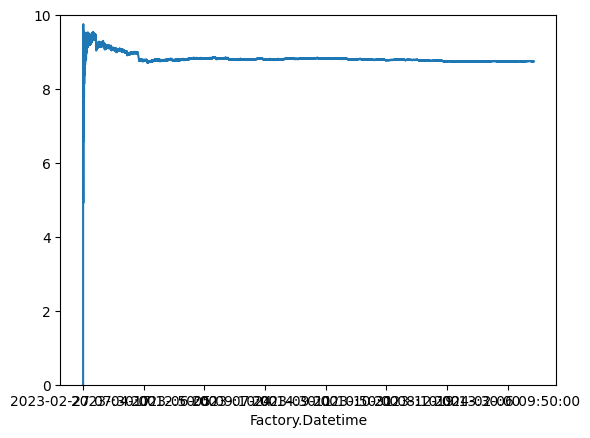

In [4]:
(
    df
    .query('`Machine.IsPlannedOperatingTime` == 1')
    .set_index('Factory.Datetime')
    .assign(
        mins=1,
        cummins=lambda x: x['mins'].cumsum()
    )
    .assign(
        oee=lambda x:
            (
            x['Product.SuccessQuantity']
            + x['Product.FailedQuantity']
        ) / x['cummins'] * 60
    )
    ['oee']
    .plot(ylim=(0, 10))
)

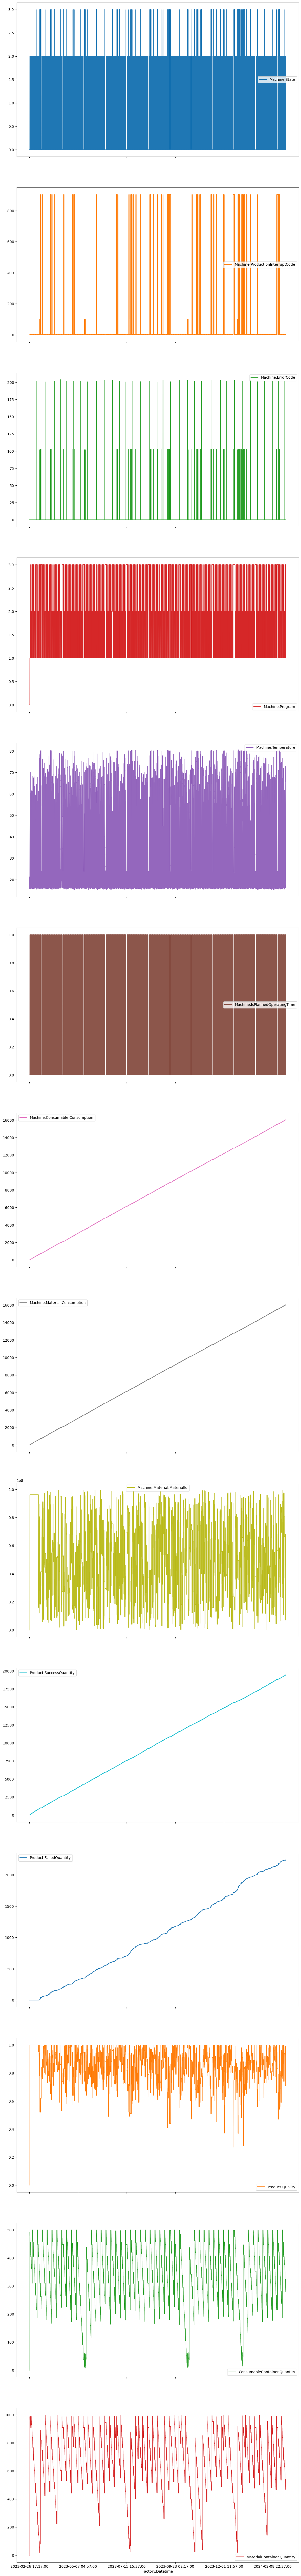

In [5]:
(
    df
    .set_index('Factory.Datetime')
    .select_dtypes('number')
    # [['Machine.ErrorCode']]
    .plot(subplots=True, figsize=(14, 8 * len(df.columns)))
);

In [ ]:
# TODO: Refactor / cleanup all
# TODO: Sensor based alarms/events
# TODO: Locking mechanism when filling stuff